In [ ]:
import sys
sys.path.append('../')

from src import customFunc as cf, ansatzes as anz

from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
import numpy as np
import matplotlib.pyplot as plt

In [31]:
estimator = Estimator()

observable = SparsePauliOp.from_list([("ZZIIIIII",1)])
print(observable)

ansatz_circuit, n_params = anz.build_deep_ansatz(8, 4)

# display(ansatz_circuit.draw("mpl"))

SparsePauliOp(['ZZIIIIII'],
              coeffs=[1.+0.j])


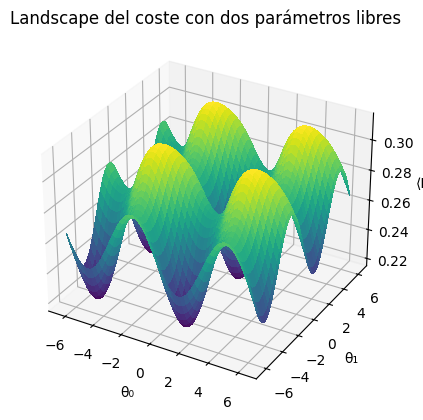

In [32]:
# Fijar valores aleatorios para todos los parámetros, excepto los dos primeros
rng = np.random.default_rng(seed=42)
full_params = rng.uniform(-np.pi, np.pi, n_params)

# Grid
resolution = 100
theta_range = np.linspace(-2*np.pi, 2*np.pi, resolution)
X, Y = np.meshgrid(theta_range, theta_range)
Z = np.zeros_like(X)

# Bucle doble para evaluar el observable
for i in range(resolution):
    for j in range(resolution):
        test_params = full_params.copy()
        test_params[0] = X[i, j]
        test_params[1] = Y[i, j]
        Z[i, j] = cf.evaluate_observable(test_params, ansatz_circuit, observable, estimator)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="viridis", linewidth=0, antialiased=False)
ax.set_xlabel("θ₀")
ax.set_ylabel("θ₁")
ax.set_zlabel("⟨H⟩")

plt.title("Landscape del coste con dos parámetros libres")
plt.show()

In [12]:
Z

array([[-0.02014032, -0.02014032, -0.02014032, ..., -0.02014032,
        -0.02014032, -0.02014032],
       [-0.02014032, -0.02014032, -0.02014032, ..., -0.02014032,
        -0.02014032, -0.02014032],
       [-0.02014032, -0.02014032, -0.02014032, ..., -0.02014032,
        -0.02014032, -0.02014032],
       ...,
       [-0.02014032, -0.02014032, -0.02014032, ..., -0.02014032,
        -0.02014032, -0.02014032],
       [-0.02014032, -0.02014032, -0.02014032, ..., -0.02014032,
        -0.02014032, -0.02014032],
       [-0.02014032, -0.02014032, -0.02014032, ..., -0.02014032,
        -0.02014032, -0.02014032]])